## Barnegat Bay Project
### Build HydroMT-SFINCS Model Using Python

Developed by *Saif Haider*, based on **Hydromt-SFINCS** online examples

In [24]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from hydromt_sfincs import SfincsModel
from hydromt_sfincs import utils

### 1- Create Data Cataloge, Initialize the model and create grid

In [25]:
import yaml
import os
from hydromt_sfincs import SfincsModel

# Define the content of the YAML file
yml_content = {
    'meta': {
        'root': 'C:/Users/Sohaib/Downloads/Sfincs-Nov',
        'version': '2025_11_01',
        'name': 'DataCatalog_BarnegatBay'
    },
    'CoNED-v3': {
        'crs': 26918,  # UTM Zone 18N (NAD83) — matches NJ East projection
        'data_type': 'RasterDataset',
        'driver': 'raster',
        'new_variable_name': 'elevtn',
        'path': 'C:/Users/Sohaib/Downloads/Sfincs-Nov/dem-/dem_ncei_nintharcsec_dem_J1231.tif'
    },
}

# Save directly to the target location
yml_file_path = "C:/Users/Sohaib/Downloads/Sfincs-Nov/Sfincs_DataCatalog.yml"

# Ensure directory exists
os.makedirs(os.path.dirname(yml_file_path), exist_ok=True)

# Write to the YAML file
with open(yml_file_path, 'w') as file:
    yaml.dump(yml_content, file, default_flow_style=False)

print(f"YAML file created/updated at: {yml_file_path}")

YAML file created/updated at: C:/Users/Sohaib/Downloads/Sfincs-Nov/Sfincs_DataCatalog.yml


Initialize SfincsModel class, set data library and output folder

In [26]:
# we overwrite (mode='w+') the existing model in the root directory if it exists
data_catalog_name = "C:/Users/Sohaib/Downloads/Sfincs-Nov/Sfincs_DataCatalog.yml"
# root = The new library we want to save the model in
sf = SfincsModel(data_libs=[data_catalog_name], root="HydroMT_Output", mode="w+")

Specify characteristics of the grid and generate grid

Approach 1: Specify an input dictionary with the grid settings x0,y0,dx,dy,nmax,mmax,rotation and epsg code.

Approach 2: if we only have a bounding box or geometry, you can also use `SfincsModel.setup_grid_from_region`.

In [27]:
import geopandas as gpd

gdf = gpd.read_file("C:/Users/Sohaib/Downloads/Sfincs-Nov/shapefile-/Export_Output_fixed.shp")
print(gdf.crs)

EPSG:26918


In [28]:
#Use a shape/geojson file to define the study area (approach 2):
sf.setup_grid_from_region(
    region = {'geom': "C:/Users/Sohaib/Downloads/Sfincs-Nov/shapefile-/Export_Output_fixed.shp"},
    res = 15,
    rotated = False,
    crs = 26918
)
print(sf.config)

{'mmax': 535, 'nmax': 336, 'dx': 15, 'dy': 15, 'x0': np.float64(574221.0), 'y0': np.float64(4432708.0), 'rotation': 0, 'latitude': 0.0, 'tref': datetime.datetime(2010, 2, 1, 0, 0), 'tstart': datetime.datetime(2010, 2, 1, 0, 0), 'tstop': datetime.datetime(2010, 2, 2, 0, 0), 'tspinup': 0.0, 'dtout': 3600.0, 'dthisout': 600.0, 'dtrstout': 0.0, 'dtmaxout': 86400, 'trstout': -999.0, 'dtwnd': 1800.0, 'alpha': 0.5, 'theta': 1.0, 'huthresh': 0.01, 'manning': 0.04, 'manning_land': 0.04, 'manning_sea': 0.02, 'rgh_lev_land': 0.0, 'zsini': 0.0, 'qinf': 0.0, 'rhoa': 1.25, 'rhow': 1024.0, 'dtmax': 60.0, 'advection': 1, 'baro': 1, 'pavbnd': 0, 'gapres': 101200.0, 'stopdepth': 100.0, 'crsgeo': 0, 'btfilter': 60.0, 'viscosity': 1, 'inputformat': 'bin', 'outputformat': 'net', 'cdnrb': 3, 'cdwnd': [0.0, 28.0, 50.0], 'cdval': [0.001, 0.0025, 0.0015], 'epsg': 26918}


### 2- Setup elevation data

In [29]:
import gc
gc.collect()
# Convert your sf.data_catalog to a DataFrame if it isn't already
data_catalog_df = pd.DataFrame(sf.data_catalog)

# Set display options to show all rows and columns in a wide format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
display(data_catalog_df)
# sf.data_catalog

,0,1
0,CoNED-v3,crs: 26918\ndata_type: RasterDataset\ndriver: raster\ndriver_kwargs:\n new_variable_name: elevtn\npath: C:\Users\Sohaib\Downloads\Sfincs-Nov\dem-\dem_ncei_nintharcsec_dem_J1231.tif\n
1,Export_Output_fixed.shp,data_type: GeoDataFrame\ndriver: vector\npath: C:/Users/Sohaib/Downloads/Sfincs-Nov/shapefile-/Export_Output_fixed.shp\nprovider: user\n


Dataset [574219.057542842, 4432731.001879259, 582232.2434278998, 4437733.90859324] does not fully cover bbox [574171.742, 4432625.368, 582300.619, 4437830.765]
Interpolate elevation at 535 cells


Error in callback <function _draw_all_if_interactive at 0x0000017393FE0720> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

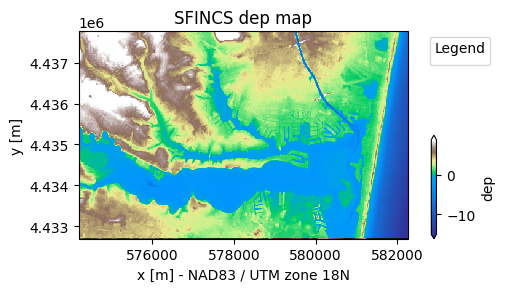

In [30]:
# To see the example of combining 2 elevation datasets, go the online example.
datasets_dep = [{"elevtn": "CoNED-v3"}]

# Add depth information to modelgrid based on these chosen datasets
dep = sf.setup_dep(datasets_dep = datasets_dep)

# Make a plot of the merged topobathy, here colour limits are set between an elevation of -5 to 5 meters
_ = sf.plot_basemap(variable="dep", bmap="sat", zoomlevel=15)

# Rotate x-axis tick labels to be horizontal
# plt.xticks(rotation=45)  # 0 degrees means horizontal
# plt.legend().set_visible(False)
# # Alternative ways to remove title:
# plt.title("Mapelev")

### 3- Create mask of active and inactive cells

Here we generate the mask of active (msk=1) and inactive cells (msk=0), determining what cells on your grid should be used. 

In [ ]:
import gc
# Choosing how to choose your active cells can be based on multiple criteria, here we only specify a minimum elevation of -3 meters (on the back bay)
# sf.setup_mask_active(exclude_mask= "C:/Users/Sohaib/Downloads/Sfincs-Nov/shapefile-/Export_Output_fixed.shp",zmin=-5, reset_mask=True)

# Make a plot of the mask file
# _ = sf.plot_basemap(variable="msk", plot_bounds=True, bmap="sat", zoomlevel=15)

# # Rotate x-axis tick labels to be horizontal
# plt.xticks(rotation=45)  # 0 degrees means horizontal
# plt.legend().set_visible(False)
# # Alternative ways to remove title:
# plt.title("")

# # Rotate x-axis tick labels to be horizontal
# plt.xticks(rotation=45)  # 0 degrees means horizontal
# gc.collect()

In [ ]:
# Make a plot of the mask file
# _ = sf.plot_basemap(variable="msk", plot_bounds=True, bmap="sat", zoomlevel=12)

Update mask with water level and outflow boundary cells

In [ ]:
# Loading a shapefile clicked by user:
#file_name = "C:/Users/Sohaib/Downloads/Sfincs-Nov/shapefile-/Export_Output_fixed.shp"
# gdf_include = sf.data_catalog.get_geodataframe(file_name)

In SFINCS you can specify cells where you want to force offshore water levels (msk=2), or outflow boundaries (msk=3)

In [ ]:
# Here we add water level cells along the coastal boundary, for cells up to an elevation of -5 meters
#sf.setup_mask_bounds(btype="waterlevel", zmax=-1, reset_bounds=True)

# Here we add outflow cells, only where clicked in shapefile along part of the lateral boundaries
# sf.setup_mask_bounds(btype="outflow", include_mask = gdf_include, reset_bounds=True)

# Make a plot of the mask file
# fig, ax = sf.plot_basemap(variable="msk", plot_bounds=True, bmap="sat", zoomlevel=12)
# gdf_include.to_crs(sf.crs).boundary.plot(
#    ax=ax, color="k", lw=1, ls="--"
# )  # plot the shapefile given by the user as dashed line

# Rotate x-axis tick labels to be horizontal
#plt.xticks(rotation=45)  # 0 degrees means horizontal
# Alternative ways to remove title:
#plt.title("")

In [ ]:
# Here we add water level cells along the coastal boundary, for cells up to an elevation of -5 meters
# sf.setup_mask_bounds(btype="waterlevel", zmax=-5, reset_bounds=True)

# Here we add outflow cells, only where clicked in shapefile along part of the lateral boundaries
# sf.setup_mask_bounds(btype="outflow", include_mask=gdf_include, reset_bounds=True)

# Make a plot of the mask file
# fig, ax = sf.plot_basemap(variable="msk", plot_bounds=True, bmap="sat", zoomlevel=12)
# gdf_include.to_crs(sf.crs).boundary.plot(
    # ax=ax, color="k", lw=1, ls="--"
# )  # plot the shapefile given by the user as dashed line

In [ ]:
# import numpy as np

# Get a working copy of the mask
#ea MSK = np.asarray(sf.grid["msk"].values).copy()  # shape (ny, nx)

# --- mark WL boundary where an ACTIVE cell (1) touches OUTSIDE (0) to the EAST ---
# neighbor to the east is 0 → flag current cell as 2
#ea east_neighbor_is_outside = np.zeros_like(MSK, dtype=bool)
#ea east_neighbor_is_outside[:, :-1] = (MSK[:, 1:] == 0)

#ea wl_bnd = (MSK == 1) & east_neighbor_is_outside
#ea MSK[wl_bnd] = 2

# (Optional) If your open boundary is on a different side, use one of these instead:
# WEST side:
# west_neighbor_is_outside = np.zeros_like(MSK, dtype=bool); west_neighbor_is_outside[:, 1:] = (MSK[:, :-1] == 0)
# wl_bnd = (MSK == 1) & west_neighbor_is_outside; MSK[wl_bnd] = 2
# SOUTH side:
# south_neighbor_is_outside = np.zeros_like(MSK, dtype=bool); south_neighbor_is_outside[1:, :] = (MSK[:-1, :] == 0)
# wl_bnd = (MSK == 1) & south_neighbor_is_outside; MSK[wl_bnd] = 2
# NORTH side:
# north_neighbor_is_outside = np.zeros_like(MSK, dtype=bool); north_neighbor_is_outside[:-1, :] = (MSK[1:, :] == 0)
# wl_bnd = (MSK == 1) & north_neighbor_is_outside; MSK[wl_bnd] = 2

# Write the updated mask back into the model and save
#ea sf.grid["msk"].data[:] = MSK
#ea sf.write()

# Check counts again
#eavals, counts = np.unique(MSK, return_counts=True)
#ea for v, c in zip(vals, counts):
   #ea print(f"msk={v}: {c} cells")

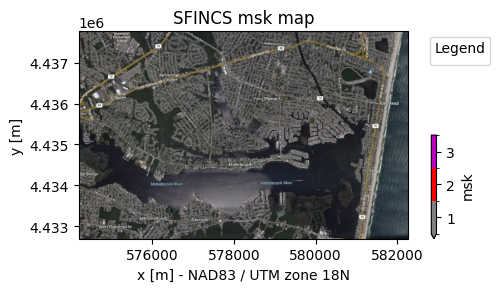

In [ ]:
_ = sf.plot_basemap(variable="msk", bmap="sat", zoomlevel=14)

### 4- setup discahrge forcing
Step 0: Define model simulation time: 

In [ ]:
# Change period of model simulation time, specified in yyyymmdd HHMMSS --> simulation time here is 24 hours
sf.setup_config(
    **{
        "tref": "20240108 010000", #take care of it!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        "tstart": "20240108 010000", #take care of it!
        "tstop": "20240108 120000", #take care of it!
        'alpha': 0.5,
    }
)
print(sf.config)

{'mmax': 535, 'nmax': 336, 'dx': 15, 'dy': 15, 'x0': np.float64(574221.0), 'y0': np.float64(4432708.0), 'rotation': 0, 'latitude': 0.0, 'tref': '20240108 010000', 'tstart': '20240108 010000', 'tstop': '20240108 120000', 'tspinup': 0.0, 'dtout': 3600.0, 'dthisout': 600.0, 'dtrstout': 0.0, 'dtmaxout': 86400, 'trstout': -999.0, 'dtwnd': 1800.0, 'alpha': 0.5, 'theta': 1.0, 'huthresh': 0.01, 'manning': 0.04, 'manning_land': 0.04, 'manning_sea': 0.02, 'rgh_lev_land': 0.0, 'zsini': 0.0, 'qinf': 0.0, 'rhoa': 1.25, 'rhow': 1024.0, 'dtmax': 60.0, 'advection': 1, 'baro': 1, 'pavbnd': 0, 'gapres': 101200.0, 'stopdepth': 100.0, 'crsgeo': 0, 'btfilter': 60.0, 'viscosity': 1, 'inputformat': 'bin', 'outputformat': 'net', 'cdnrb': 3, 'cdwnd': [0.0, 28.0, 50.0], 'cdval': [0.001, 0.0025, 0.0015], 'epsg': 26918, 'depfile': 'sfincs.dep'}


In [ ]:
from shapely.geometry import Point
import geopandas as gpd

# === Step 3: Create discharge point(s) ===

# Your discharge point coordinates (lon, lat)
lon, lat = -74.129285,   40.062503   # note: x=lon, y=lat

# Wrap them in lists (so you can add more points later if needed)
x = [lon]
y = [lat]

# Index must start at 1 (SFINCS convention)
index = [1]

# Build GeoDataFrame in same CRS as the model
dis_gdf = gpd.GeoDataFrame(
    index=index,
    geometry=gpd.points_from_xy(x, y),
    crs="EPSG:4326"
)

# Reproject to model CRS if available
if sf.crs is not None and dis_gdf.crs != sf.crs:
    dis_gdf = dis_gdf.to_crs(sf.crs)

# Register this as discharge forcing locations
sf.set_forcing(name="dis", data=dis_gdf)

# Show what has been created
display(dis_gdf)
print(" Discharge forcing point(s) registered in model.")

,geometry
1,POINT (574256.658 4435057.647)


 Discharge forcing point(s) registered in model.


4.1 discharge, tide points

In [ ]:
from shapely.geometry import Point
import geopandas as gpd

# === Step 1: Define CRS ===
crs = "EPSG:4326"   # WGS84 (lat/lon)

# === Step 2: Discharge point ===
dis_lon, dis_lat = -74.129285, 40.062503
dis_gdf = gpd.GeoDataFrame(
    index=[1],
    geometry=gpd.points_from_xy([dis_lon], [dis_lat]),
    crs=crs
)
if sf.crs is not None and dis_gdf.crs != sf.crs:
    dis_gdf = dis_gdf.to_crs(sf.crs)
sf.set_forcing(name="dis", data=dis_gdf)
print("Discharge forcing point registered.")


# === Step 3: Tide point ===
tide_lon, tide_lat = -74.056547,  40.041178
tide_gdf = gpd.GeoDataFrame(
    index=[1],
    geometry=gpd.points_from_xy([tide_lon], [tide_lat]),
    crs=crs
)
if sf.crs is not None and tide_gdf.crs != sf.crs:
    tide_gdf = tide_gdf.to_crs(sf.crs)
sf.set_forcing(name="tide", data=tide_gdf)
print("Tide forcing point registered.")


# === Step 4: Water level (wl) point ===
wl_lon, wl_lat = -74.067161, 40.085888
wl_gdf = gpd.GeoDataFrame(
    index=[1],
    geometry=gpd.points_from_xy([wl_lon], [wl_lat]),
    crs=crs
)
if sf.crs is not None and wl_gdf.crs != sf.crs:
    wl_gdf = wl_gdf.to_crs(sf.crs)
sf.set_forcing(name="wl", data=wl_gdf)
print("Water level forcing point registered.")


# === Step 5: Display to verify ===
display(dis_gdf, tide_gdf, wl_gdf)

Discharge forcing point registered.
Tide forcing point registered.
Water level forcing point registered.


,geometry
1,POINT (574256.658 4435057.647)


,geometry
1,POINT (580485.104 4432753.918)


,geometry
1,POINT (579527.612 4437706.921)


Step:5 Setting up discharge forcing

In [ ]:
# --- (re)create point layers (kept in EPSG:4326) ---
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

data_dir = r"C:\Users\Sohaib\Downloads\Sfincs-Nov\simulation-data\full timeseries data"

# Your lon/lat
wl1_lon, wl1_lat = -74.067161, 40.085888   # Watson
wl2_lon, wl2_lat = -74.056547, 40.041178   # Tide
dis_lon, dis_lat = -74.129285, 40.062503   # Discharge

# Files
wl1_file = "tide_timeseries_watson.txt"
wl2_file = "tide_timeseries.txt"
dis_file = "discharge_timeseries_formatted.txt"

# Build location GeoDataFrames (IDs must be ints matching your time-series columns)
bzs_gdf = gpd.GeoDataFrame(
    index=[1, 2],
    geometry=gpd.points_from_xy([wl1_lon, wl2_lon], [wl1_lat, wl2_lat]),
    crs="EPSG:4326"
)
dis_gdf = gpd.GeoDataFrame(
    index=[1],
    geometry=gpd.points_from_xy([dis_lon], [dis_lat]),
    crs="EPSG:4326"
)

def read_any_ts(fp, datetime_fmt="%Y-%m-%d %H:%M:%S", value_col=None):
    times, vals = [], []
    with open(fp, "r", encoding="utf-8-sig") as f:
        for raw in f:
            s = raw.strip()
            if not s: 
                continue
            low = s.lower()
            if ("date" in low and "time" in low) or "tide" in low or "discharge" in low or "flow" in low:
                continue
            parts = [p for p in (s.split(",") if "," in s else s.split()) if p]
            if len(parts) < 2:
                continue
            if len(parts) >= 3:
                dt_str = f"{parts[0]} {parts[1]}"
                v_idx = (len(parts)-1 if value_col is None else min(value_col, len(parts)-1))
            else:
                dt_str = parts[0]
                v_idx = (1 if value_col is None else min(value_col, len(parts)-1))
            t = pd.to_datetime(dt_str, format=datetime_fmt, errors="coerce")
            if pd.isna(t):
                t = pd.to_datetime(dt_str, errors="coerce", dayfirst=False)
            v = pd.to_numeric(parts[v_idx], errors="coerce")
            if pd.notna(t) and pd.notna(v):
                times.append(t); vals.append(v)
    if not times:
        raise ValueError(f"No valid rows parsed in {fp}")
    ts = pd.Series(vals, index=pd.to_datetime(times)).sort_index()
    ts = ts[~ts.index.duplicated(keep="first")]
    return ts.to_frame("val")

# Read series
wl1 = read_any_ts(os.path.join(data_dir, wl1_file))
wl2 = read_any_ts(os.path.join(data_dir, wl2_file))
q   = read_any_ts(os.path.join(data_dir, dis_file))

print(f"WL1: {wl1.index.min()} → {wl1.index.max()} | n={len(wl1)} | range={wl1.val.min():.6f}..{wl1.val.max():.6f}")
print(f"WL2: {wl2.index.min()} → {wl2.index.max()} | n={len(wl2)} | range={wl2.val.min():.6f}..{wl2.val.max():.6f}")
print(f"DIS: {q.index.min()}  → {q.index.max()}  | n={len(q)}   | range={q.val.min():.6f}..{q.val.max():.6f}")

# Optional window clip
tstart = sf.config.get("tstart"); tstop = sf.config.get("tstop")
def clip(df):
    if pd.notna(tstart) and pd.notna(tstop):
        return df.loc[(df.index >= pd.Timestamp(tstart)) & (df.index <= pd.Timestamp(tstop))]
    return df
wl1, wl2, q = clip(wl1), clip(wl2), clip(q)

# Wide frames keyed by IDs
bzs_ts = pd.DataFrame(index=wl1.index)
bzs_ts[1] = wl1["val"].values
bzs_ts = bzs_ts.join(wl2.rename(columns={"val": "2"}), how="outer")
bzs_ts.columns = [int(c) for c in bzs_ts.columns]

dis_ts = pd.DataFrame(index=q.index)
dis_ts[1] = q["val"].values

# >>> IMPORTANT CHANGE: pass gdf_locs and use merge=False on first write <<<
sf.set_forcing_1d(df_ts=bzs_ts.sort_index(), gdf_locs=bzs_gdf, name="bzs", merge=False)  # meters
sf.set_forcing_1d(df_ts=dis_ts.sort_index(),  gdf_locs=dis_gdf,  name="dis", merge=False)  # m^3/s

sf.write()

print(f"Written WL to IDs {list(bzs_ts.columns)}; Discharge to ID 1. "
      f"Timesteps: WL={len(bzs_ts)}, DIS={len(dis_ts)}")

WL1: 2024-01-08 01:00:00 → 2024-01-15 00:54:00 | n=1680 | range=-3.020000..4.770000
WL2: 2024-01-08 01:30:00 → 2024-01-15 00:30:00 | n=297 | range=-0.045720..1.054608
DIS: 2024-01-08 01:00:00  → 2024-01-15 00:45:00  | n=672   | range=2.574001..20.841199
Written WL to IDs [1, 2]; Discharge to ID 1. Timesteps: WL=111, DIS=45


In [ ]:
print("Model window now:",
      "tstart=", sf.config.get("tstart"),
      "tstop=",  sf.config.get("tstop"))

Model window now: tstart= 20240108 010000 tstop= 20240108 120000


In [ ]:
import pandas as pd

# 1) Build full-span window from your CURRENT (resampled) series
tmin = min(bzs_ts.index.min(), dis_ts.index.min())
tmax = max(bzs_ts.index.max(), dis_ts.index.max())

# Optional buffer (keep if you like)
buf = pd.Timedelta(hours=1)
tmin_b = (tmin - buf)
tmax_b = (tmax + buf)

# 2) Set model window using SFINCS format: "%Y%m%d %H%M%S"
sf.config["tstart"] = tmin_b.strftime("%Y%m%d %H%M%S")
sf.config["tstop"]  = tmax_b.strftime("%Y%m%d %H%M%S")

print("Updated (SFINCS-format) window:",
      "tstart=", sf.config["tstart"], "tstop=", sf.config["tstop"])

# 3) Ensure indices are timezone-naive & strictly increasing
bzs_ts.index = pd.DatetimeIndex(bzs_ts.index).tz_localize(None)
dis_ts.index = pd.DatetimeIndex(dis_ts.index).tz_localize(None)
bzs_ts = bzs_ts[~bzs_ts.index.duplicated(keep="first")].sort_index()
dis_ts = dis_ts[~dis_ts.index.duplicated(keep="first")].sort_index()

# 4) Overwrite forcing (first write uses merge=False + gdf_locs)
sf.set_forcing_1d(df_ts=bzs_ts, name="bzs", merge=False, gdf_locs=bzs_gdf)   # meters
sf.set_forcing_1d(df_ts=dis_ts, name="dis",  merge=False, gdf_locs=dis_gdf)  # m^3/s
sf.write()

print(f"Done. WL timesteps: {len(bzs_ts)} ({bzs_ts.index.min()} → {bzs_ts.index.max()}) | "
      f"DIS timesteps: {len(dis_ts)} ({dis_ts.index.min()} → {dis_ts.index.max()})")

Updated (SFINCS-format) window: tstart= 20240108 000000 tstop= 20240108 130000
Done. WL timesteps: 111 (2024-01-08 01:00:00 → 2024-01-08 12:00:00) | DIS timesteps: 45 (2024-01-08 01:00:00 → 2024-01-08 12:00:00)


In [ ]:
import pandas as pd

# Use the UNCLIPPED original series (not the short window ones)
tmin = min(wl1.index.min(), wl2.index.min(), q.index.min())
tmax = max(wl1.index.max(), wl2.index.max(), q.index.max())

sf.config["tstart"] = tmin.strftime("%Y%m%d %H%M%S")
sf.config["tstop"]  = tmax.strftime("%Y%m%d %H%M%S")
print("Window set to:", sf.config["tstart"], "→", sf.config["tstop"])

# If needed, resample to your SFINCS dt
DT = int(sf.config.get("dt", 60))
bzs_ts = bzs_ts.resample(f"{DT}S").mean()
dis_ts = dis_ts.resample(f"{DT}S").mean()

# Overwrite
sf.set_forcing_1d(df_ts=bzs_ts, name="bzs", merge=False, gdf_locs=bzs_gdf)
sf.set_forcing_1d(df_ts=dis_ts,  name="dis",  merge=False, gdf_locs=dis_gdf)
sf.write()

Window set to: 20240108 010000 → 20240108 120000


In [ ]:
import pandas as pd

# --- 1) Target grid from the config window ---
DT = int(sf.config.get("dt", 60))  # seconds
t0 = pd.to_datetime("2024-01-08 01:00:00")
t1 = pd.to_datetime("2024-01-08 12:00:00")
idx = pd.date_range(t0, t1, freq=f"{DT}S")  # inclusive end → expect 11h/DT + 1 samples

# # --- 2) Reindex to exact grid (choose interpolation for each) ---
# # WL: linear-in-time is standard
# bzs_ts_aligned = bzs_ts.reindex(idx).interpolate(method="time")

# # DIS: choose ONE — linear (smooth) or step-hold (staircase). Linear is common unless you want steps.
# dis_ts_aligned_linear = dis_ts.reindex(idx).interpolate(method="time")
# # dis_ts_aligned_step  = dis_ts.reindex(idx).ffill()

# # --- 3) Overwrite (first write for this window → merge=False, include locations) ---
# sf.set_forcing_1d(df_ts=bzs_ts_aligned,       name="bzs", merge=False, gdf_locs=bzs_gdf)   # meters
# sf.set_forcing_1d(df_ts=dis_ts_aligned_linear, name="dis", merge=False, gdf_locs=dis_gdf)  # m³/s
# sf.write()

# print(
#     f"Written WL={len(bzs_ts_aligned)} ({bzs_ts_aligned.index.min()} → {bzs_ts_aligned.index.max()}), "
#     f"DIS={len(dis_ts_aligned_linear)}"
# )

Step 6: Show the model

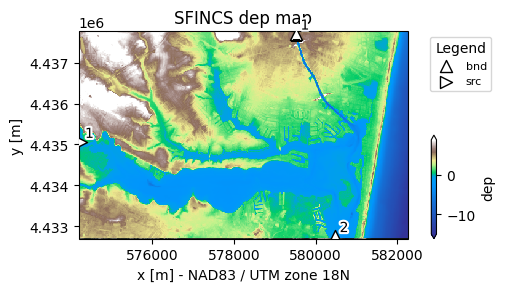

In [ ]:
# Use predefined plotting function 'plot_basemap' to show your full SFINCS model setup
fig, ax = sf.plot_basemap(fn_out="basemap.png", bmap="sat", zoomlevel=15)

# Rotate x-axis tick labels to be horizontal
# plt.xticks(rotation=45)  # 0 degrees means horizontal
# plt.legend().set_visible(False)

# # Alternative ways to remove title:
# plt.title("")

# # Customize axis labels
# ax.set_xlabel('Easting (m)')
# ax.set_ylabel('Northing (m)')